In [2]:
import sys
sys.path.insert(1, 'functions')
import numpy as np
import pandas as pd
import scipy.io
import scipy
import matplotlib
import matplotlib.pyplot as plt
from scipy import stats
from sklearn import preprocessing
from statsmodels.graphics.gofplots import qqplot
from scipy.stats import normaltest
from normality_function import normality_fun
import statsmodels.api as sm
from statsmodels.tsa.arima_model import ARMA
import statsmodels
from scipy.interpolate import interp1d
from scipy import signal
from scipy.fft import fftshift

# Import mat files
mat_angle = scipy.io.loadmat('data/angle_40bpm.mat')
mat_emg1 = scipy.io.loadmat('data/emg1_40bpm.mat')
mat_emg2 = scipy.io.loadmat('data/emg2_40bpm.mat')

# Convert them to numpy arrays
angle = np.array(mat_angle['angle1'])
emg1 = np.array(mat_emg1['emg1'])
emg2 = np.array(mat_emg2['emg2'])
T = 0.001
N = emg1.shape[0]

# Normalize data
scaler = preprocessing.StandardScaler().fit(emg1)
emg1 = scaler.transform(emg1)
scaler = preprocessing.StandardScaler().fit(emg2)
emg2 = scaler.transform(emg2)


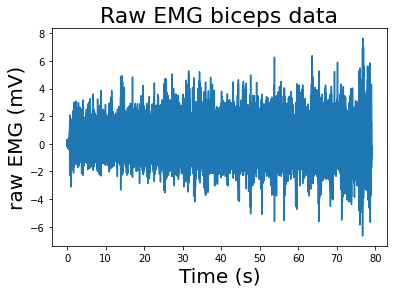

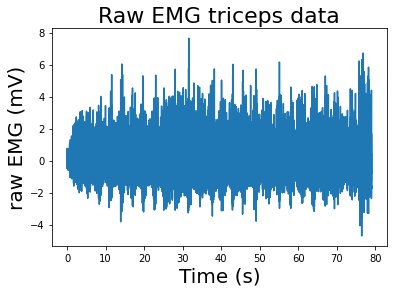

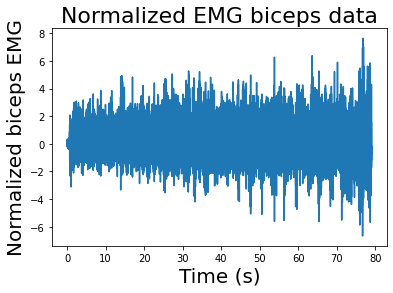

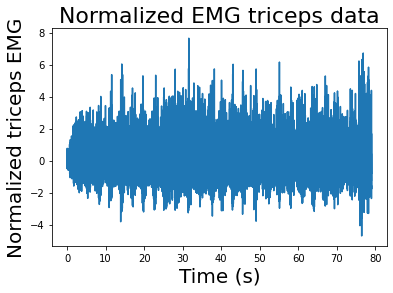

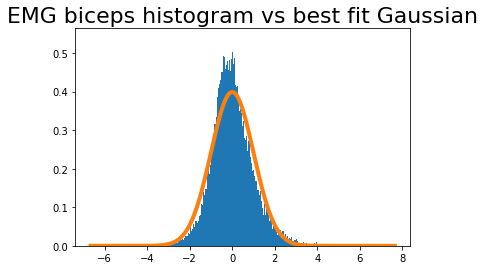

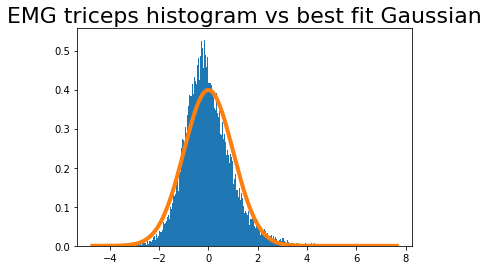

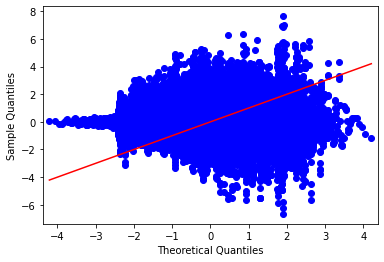

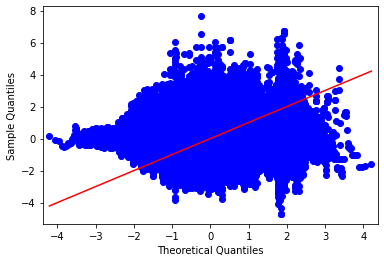

Statistics=5552.241, p=0.000
Sample does not look Gaussian (reject H0)
Statistics=9556.130, p=0.000
Sample does not look Gaussian (reject H0)


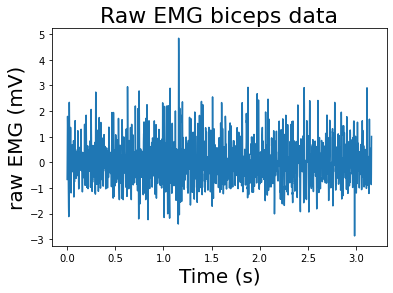

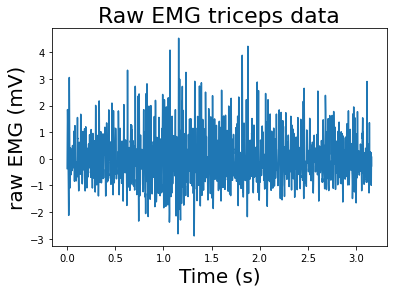

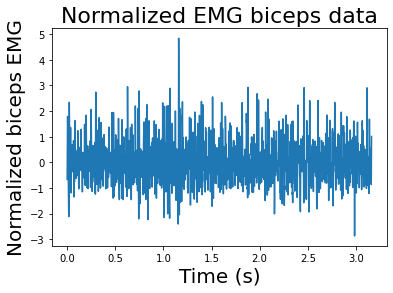

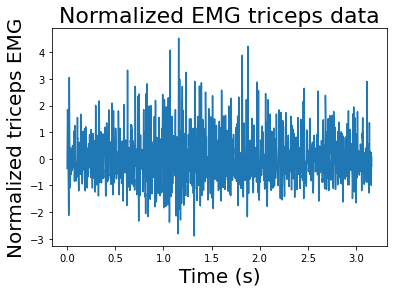

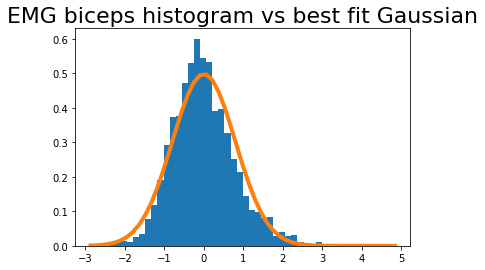

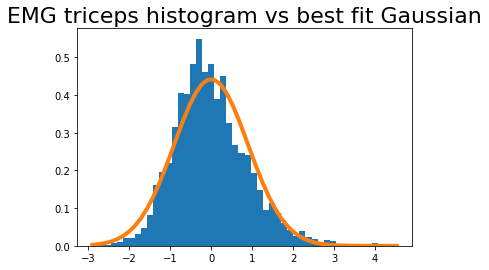

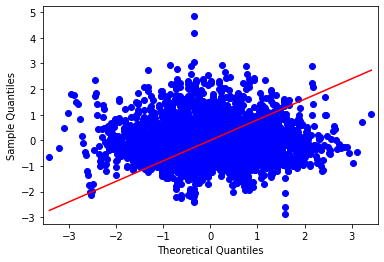

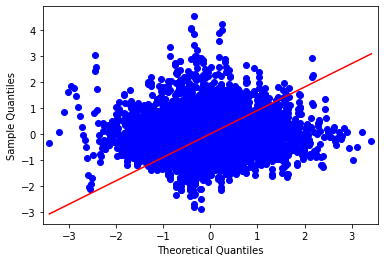

Statistics=220.924, p=0.000
Sample does not look Gaussian (reject H0)
Statistics=264.931, p=0.000
Sample does not look Gaussian (reject H0)


In [3]:
# Test normality
n = 1000
normality_fun(emg1, emg2, n)

# Perform tests in a smaller quantity
emg1_small = emg1[int(0.2*N):int(0.24*N)]
emg2_small = emg2[int(0.2*N):int(0.24*N)]

# Test normality on smaller sample
n = 50
normality_fun(emg1_small, emg2_small, n)